## <b><font color='darkblue'>Preface</font></b>
([article source](https://realpython.com/chromadb-vector-database/)) <b><font size='3ptx'>The era of [large language models](https://en.wikipedia.org/wiki/Large_language_model) (LLMs) is here, bringing with it rapidly evolving libraries like [ChromaDB](https://docs.trychroma.com/) that help augment LLM applications. You’ve most likely heard of chatbots like OpenAI’s [ChatGPT](https://realpython.com/chatgpt-coding-mentor-python/), and perhaps you’ve even experienced their remarkable ability to reason about [natural language processing (NLP)](https://en.wikipedia.org/wiki/Natural_language_processing) problems.</font></b>

Modern LLMs, while imperfect, can accurately solve a wide range of problems and provide correct answers to many questions. But, <b>due to the limits of their training and the number of text tokens they can process, LLMs aren’t a silver bullet for all tasks</b>.

<b>You wouldn’t expect an LLM to provide relevant responses about topics that don’t appear in their training data.</b> For example, if you asked ChatGPT to summarize information in confidential company documents, then you’d be out of luck. <b>You could show some of these documents to ChatGPT, but there’s a limited number of documents that you can upload before you exceed ChatGPT’s maximum number of tokens. How would you select documents to show ChatGPT?</b>

<b>To address these shortcomings and scale your LLM applications, one great option is to use a <font color='darkblue'>vector database</font> like ChromaDB</b>. A vector database allows you to store encoded unstructured objects, like text, as lists of numbers that you can compare to one another. You can, for example, find a collection of documents relevant to a question that you want an LLM to answer.

In this tutorial, you’ll learn about:
* Representing unstructured objects with vectors
* Using word and text embeddings in Python
* Harnessing the power of vector databases
* Encoding and querying over documents with ChromaDB
* Providing context to LLMs like ChatGPT with ChromaDB

<a id='agenda'></a>
### <b><font color='darkgreen'>Agenda</font></b>
* <b><font size='3ptx'><a href='#sect1'>Represent Data as Vectors</a></font></b>
* <b><font size='3ptx'><a href='#sect2'>Encode Objects in Embeddings</a></font></b>
* <b><font size='3ptx'><a href='#sect3'>Get Started With ChromaDB, an Open-Source Vector Database</a></font></b>
* <b><font size='3ptx'><a href='#sect4'>Practical Example: Add Context for a Large Language Model (LLM)</a></font></b>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import spacy

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


<a id='sect1'></a>
## <b><font color='darkblue'>Represent Data as Vectors</font></b>
<b><font size='3ptx'>Before diving into embeddings and vector databases, you should understand what vectors are and what they represent.</font></b> Feel free to skip ahead to the next section if you’re already comfortable with vector concepts. If you’re not or if you could use a refresher, then keep reading!
* <b><a href='#sect1_1'>Vector Basics</a></b>
* <b><a href='#sect1_2'>Vector Similarity</a></b>

<a id='sect1_1'></a>
### <b><font color='darkgreen'>Vector Basics</font></b>
<b><font size='3ptx'>You can describe vectors with variable levels of complexity, but one great starting place is to think of a vector as an [array](https://realpython.com/numpy-array-programming/#getting-into-shape-intro-to-numpy-arrays) of numbers.</font></b> For example, you could represent vectors using NumPy arrays as follows:

In [2]:
vector1 = np.array([1, 0])
vector2 = np.array([0, 1])
vector1

array([1, 0])

In [3]:
vector2

array([0, 1])

You’ve created two NumPy arrays that represent vectors. Now what? It turns out you can do a lot of cool things with vectors, but before continuing on, you’ll need to understand some key definitions and properties:
* **Dimension**: The dimension of a vector is the number of elements that it contains. In the example above, `vector1` and `vector2` are both two-dimensional since they each have two elements. You can only visualize vectors with three dimensions or less, but generally, vectors can have any number of dimensions. In fact, as you’ll see later, vectors that encode words and text tend to have hundreds or thousands of dimensions.
* **Magnitude**: The magnitude of a vector is a non-negative number that represents the vector’s size or length. You can also refer to the magnitude of a vector as the **norm**, and you can denote it with ||v|| or |v|. There are many different definitions of magnitude or norm, but the most common is the [**Euclidean norm**](https://en.wikipedia.org/wiki/Norm_(mathematics)#Euclidean_norm) or 2-norm. You’ll learn how to compute this later.
* **Unit vector**: A unit vector is a vector with a magnitude of one. In the example above, `vector1` and `vector2` are unit vectors.
* **Direction**: The direction of a vector specifies the line along which the vector points. You can represent direction using angles, unit vectors, or coordinates in different coordinate systems.
* [**Dot product**](https://en.wikipedia.org/wiki/Dot_product) (<font color='brown'>scalar product</font>): The dot product of two vectors, `u` and `v`, is a number given by $u ⋅ v = ||u|| ||v|| cos(θ)$, where `θ` is the angle between the two vectors. Another way to compute the dot product is to do an element-wise multiplication of `u` and `v` and sum the results. The dot product is one of the most important and widely used vector operations because it measures the similarity between two vectors. You’ll see more of this later on.
* **Orthogonal vectors**: Vectors are orthogonal if their dot product is zero, meaning that they’re at a 90 degree angle to each other. You can think of orthogonal vectors as being completely unrelated to each other.
* **Dense vector**: A vector is considered dense if most of its elements are non-zero. Later on, you’ll see that words and text are most usefully represented with dense vectors because each dimension encodes meaningful information.

While there are many more definitions and properties to learn, these six are most important for this tutorial. To solidify these ideas with code, check out the following block. Note that for the rest of this tutorial, you’ll use `v1`, `v2`, and `v3` to name your vectors:

In [4]:
v1 = np.array([1, 0])
v2 = np.array([0, 1])
v3 = np.array([np.sqrt(2), np.sqrt(2)])

In [5]:
# Dimension
v1.shape

(2,)

In [6]:
# Magnitude
np.sqrt(np.sum(v1**2))

1.0

In [7]:
np.linalg.norm(v1)

1.0

In [8]:
np.linalg.norm(v3)

2.0

In [9]:
# Dot product
np.sum(v1 * v3)

1.4142135623730951

In [10]:
v1 @ v3

1.4142135623730951

A better way to compute the dot product is to use the at-operator (`@`), as you see with $v1 @ v3$. This is because `@` can perform both vector and matrix multiplications, and the syntax is cleaner.

While all of these vector definitions and properties may seem straightforward to compute, you might still be wondering what they actually mean and why they’re important to understand. One way to better understand vectors is to visualize them in two dimensions. In this context, you can represent vectors as arrows, like in the following plot:

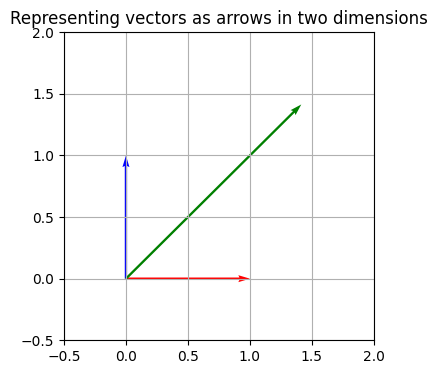

In [11]:
# Create the plot
plt.rcParams['figure.figsize'] = [4, 4]
fig, ax = plt.subplots()
V = np.array([v1, v2, v3])
origin = np.array([[0, 0, 0],[0, 0, 0]]) # origin point
ax.quiver(*origin, V[:,0], V[:,1], color=['r','b','g'], scale=1, angles='xy', scale_units='xy')
ax.set_xlim([-0.5, 2])
ax.set_ylim([-0.5, 2])
plt.grid()
plt.title('Representing vectors as arrows in two dimensions')
plt.show()

The above plot shows the visual representation of the vectors `v1` (R), `v2` (B), and `v3` (G) that you worked with in the last example. The tail of each vector arrow always starts at the origin, and the tip is located at the coordinates specified by the vector. As an example, the tip of `v1` lies at (1, 0), and the tip of `v3` lies at roughly (1.414, 1.414). The length of each vector arrow corresponds to the magnitude that you calculated earlier.

From this visual, you can make the following key inferences:
1. `v1` and `v2` are unit vectors because their magnitude, given by the arrow length, is one. `v3` isn’t a unit vector, and its magnitude is two, twice the size of `v1` and `v2`.
2. `v1` and `v2` are **orthogonal** because their tails meet at a 90 degree angle. You see this visually but can also verify it computationally by computing the dot product between `v1` and `v2`. By using the dot product definition, $v1 ⋅ v2 = ||v1|| ||v2|| cos(θ)$, you can see that when $θ = 90$, $cos(θ) = 0$ and $v1 ⋅ v2 = 0$. Intuitively, you can think of `v1` and `v2` as being totally unrelated or having nothing to do with each other. This will become important later.
3. `v3` makes a 45 degree angle with both `v1` and `v2`. This means that `v3` will have a non-zero dot product with `v1` and `v2`. This also means that `v3` is equally related to both `v1` and `v2`. In general, the smaller the angle between two vectors, the more they point toward a common direction.

You’ve now seen how vectors are characterized both computationally and visually. With this understanding, you’re ready to take a slightly deeper dive into the idea of vector similarity. If you only take away one thing from this introduction, it should be what follows.

<a id='sect1_2'></a>
### <b><font color='darkgreen'>Vector Similarity</font></b> ([back](#sect1))
<b><font size='3ptx'>The ability to measure vector similarity is crucial in machine learning and mathematics more broadly. </font></b>

The foundation for this measurement lies in the dot product, which serves as the bedrock for many vector similarity metrics. <b>One issue with the dot product, when used in isolation, is that it can take on any value and is therefore difficult to interpret in absolute terms. For example, if you know only that the dot product between two vectors is -3, then it’s unclear what that means without more context</b>.

To overcome this shortcoming, one common approach is to use [**cosine similarity**](https://en.wikipedia.org/wiki/Cosine_similarity), a normalized form of the dot product. You compute cosine similarity by taking the cosine of the angle between two vectors. In essence, you rearrange the cosine definition of the dot product from earlier to solve for cos(θ). The equation for cosine similarity looks like this:
![cosine similarity](https://realpython.com/cdn-cgi/image/width=982,format=auto/https://files.realpython.com/media/Screenshot_2023-10-30_at_1.17.14_PM.56871536fa90.png)

<b>Cosine similarity disregards the magnitude of both vectors, forcing the calculation to lie between -1 and 1</b>. This is a really nice property because it gives cosine similarity the following interpretations:
* **A value of 1 means the angle between the two vectors is 0 degrees**. In other words, the two vectors are **similar** because they point in the exact same direction. Keep in mind this doesn’t mean that the vectors have the same magnitude.
* **A value of 0 means the angle between the two vectors is 90 degrees**. In this case, the vectors are orthogonal and **unrelated** to each other.
* **A value of -1 means the angle between the two vectors is 180 degrees**. This is an interesting case where the vectors are **dissimilar** because they point in opposite directions.

In short, a cosine similarity of 1 means the vectors are similar, 0 means the vectors are unrelated, and -1 means the vectors are opposite. Any values in between represent varying degrees of similarity or dissimilarity. 

<b>You now have a feel for what vectors are and how you can assess their similarity</b>. While there are many more vector concepts to learn about, you know enough to speak the language of embeddings and vector databases. In the next section, you’ll see how to convert words and sentences to vectors, a key prerequisite to text-based vector databases.

<a id='sect2'></a>
## <b><font color='darkblue'>Encode Objects in Embeddings</font></b> ([back](#agenda))
<b><font size='3ptx'>The next step in your journey to understanding and using vector databases like ChromaDB is to get a feel for [embeddings](https://en.wikipedia.org/wiki/Word_embedding). </font></b>
* <b><a href='#sect2_1'>Word Embeddings</a></b>
* <b><a href='#sect2_2'>Text Embeddings</a></b>

[**Embeddings**](https://en.wikipedia.org/wiki/Word_embedding) are a way to represent data such as words, text, images, and audio in a numerical format that computational algorithms can more easily process.

More specifically, **embeddings are dense vectors that characterize meaningful information about the objects that they encode. The most common kinds of embeddings are word and text embeddings, and that’s what you’ll focus on in this tutorial**.

<a id='sect2_1'></a>
### <b><font color='darkgreen'>Word Embeddings</font></b>
<b><font size='3ptx'>A word embedding is a vector that captures the semantic meaning of word. </font></b>

<b>Ideally, words that are semantically similar in natural language should have embeddings that are similar to each other in the encoded vector space</b>. Analogously, words that are unrelated or opposite of one another should be further apart in the vector space.

One of the best ways to conceptualize this idea is to plot example word vectors in two dimensions. Take a good look at this scatterplot:
![word embedding](https://files.realpython.com/media/Screenshot_2023-09-03_at_2.52.02_PM.5681ade2fa81.png)
<center>Example word embeddings in two dimensions</center>

<br/>

This plot shows hand-crafted word embeddings plotted in two dimensions. Each point indicates where the word embedding’s tail lies. You’ll notice how related words are clustered together, while unrelated words are far from each other.

<b>Word embeddings try to capture these semantic relationships for a large vocabulary of words, and as you might imagine, there are a lot of complex relationships to consider</b>. This is why, in practice, word embeddings often require hundreds or thousands of dimensions to account for the complexities of human language.

You’re now ready to get started using word vectors in Python. For this, you’ll use the popular spaCy library, a general-purpose NLP library. To install [**spaCy**](https://realpython.com/natural-language-processing-spacy-python/), create a virtual environment, activate it, and run the following command:
```shell
(venv) $ python -m pip install spacy
```

After you’ve installed spaCy, you’ll also need to download a [**model**](https://spacy.io/models) that provides word embeddings, among other features. For this tutorial, you’ll want to install the medium or large English model:
```shell
(venv) $ python -m spacy download en_core_web_md
```

<b>SpaCy’s `en_core_web_md` model includes 20,000 pre-trained word embeddings, each of which has 300 dimensions</b>. This is more than enough for the examples that you’ll see next, but if you have the appetite for more word embeddings, then you can download the `en_core_web_lg` model, which has 514,000 embeddings.

With spaCy’s medium or large English model installed, you’re ready to get started using word embeddings. It only takes a few lines of code to look up embeddings:

In [12]:
nlp = spacy.load("en_core_web_md")

In [13]:
dog_embedding = nlp.vocab["dog"].vector
print(type(dog_embedding))
print(dog_embedding.shape)
dog_embedding

<class 'numpy.ndarray'>
(300,)


array([ 1.2330e+00,  4.2963e+00, -7.9738e+00, -1.0121e+01,  1.8207e+00,
        1.4098e+00, -4.5180e+00, -5.2261e+00, -2.9157e-01,  9.5234e-01,
        6.9880e+00,  5.0637e+00, -5.5726e-03,  3.3395e+00,  6.4596e+00,
       -6.3742e+00,  3.9045e-02, -3.9855e+00,  1.2085e+00, -1.3186e+00,
       -4.8886e+00,  3.7066e+00, -2.8281e+00, -3.5447e+00,  7.6888e-01,
        1.5016e+00, -4.3632e+00,  8.6480e+00, -5.9286e+00, -1.3055e+00,
        8.3870e-01,  9.0137e-01, -1.7843e+00, -1.0148e+00,  2.7300e+00,
       -6.9039e+00,  8.0413e-01,  7.4880e+00,  6.1078e+00, -4.2130e+00,
       -1.5384e-01, -5.4995e+00,  1.0896e+01,  3.9278e+00, -1.3601e-01,
        7.7732e-02,  3.2218e+00, -5.8777e+00,  6.1359e-01, -2.4287e+00,
        6.2820e+00,  1.3461e+01,  4.3236e+00,  2.4266e+00, -2.6512e+00,
        1.1577e+00,  5.0848e+00, -1.7058e+00,  3.3824e+00,  3.2850e+00,
        1.0969e+00, -8.3711e+00, -1.5554e+00,  2.0296e+00, -2.6796e+00,
       -6.9195e+00, -2.3386e+00, -1.9916e+00, -3.0450e+00,  2.48

This is pretty neat! The `nlp.vocab` object allows you to find the word embedding for any word in the model’s vocabulary. You can now assess the similarity between word embeddings using metrics like cosine similarity. To do this, create a new file called cosine_similarity.py in your working directory that contains the following function:
- `cosine_similarity.py`

```python
import numpy as np

def compute_cosine_similarity(u: np.ndarray, v: np.ndarray) -> float:
    """Compute the cosine similarity between two vectors"""

    return (u @ v) / (np.linalg.norm(u) * np.linalg.norm(v))
```

This function computes the cosine similarity between two NumPy arrays, `u` and `v`, using the definition discussed previously. You can pass word embeddings directly from spaCy into <font color='blue'>compute_cosine_similarity()</font> to see how related they are:

In [14]:
from cosine_similarity import compute_cosine_similarity

In [15]:
dog_embedding = nlp.vocab["dog"].vector
cat_embedding = nlp.vocab["cat"].vector
apple_embedding = nlp.vocab["apple"].vector
tasty_embedding = nlp.vocab["tasty"].vector
delicious_embedding = nlp.vocab["delicious"].vector
truck_embedding = nlp.vocab["truck"].vector

In [16]:
compute_cosine_similarity(dog_embedding, cat_embedding)

0.8220817

In [17]:
compute_cosine_similarity(delicious_embedding, tasty_embedding)

0.8482092

In [18]:
compute_cosine_similarity(apple_embedding, delicious_embedding)

0.5347654

In [19]:
compute_cosine_similarity(dog_embedding, apple_embedding)

0.22881007

In [20]:
compute_cosine_similarity(truck_embedding, delicious_embedding)

0.0897876

In this block, you import spacy and <font color='blue'>compute_cosine_similarity()</font>, and you instantiate an `nlp` object using the medium-size English model. Next, you look up and store embeddings for six common words from the model’s vocabulary. By computing the cosine similarity between these embeddings, you get a sense for how the model views their semantic relationship. Here are some important observations about the similarity scores:
* The `cat` and `dog` embeddings have a relatively high cosine similarity. This is likely because `cats` and `dogs` are common house pets, and you can find the word `dog` close to the word `cat` in English texts.
* The `delicious` and `tasty` embeddings also have a high cosine similarity because they have almost the same meaning. However, unlike the `dog` and `cat` embeddings, `delicious` and `tasty` have similar word embeddings because you can use them interchangeably.
* The `truck` and `delicious` embeddings have a cosine similarity close to 0. As you might expect, `truck` and `delicious` aren’t words that commonly appear in the same context.

<b>Word embeddings are great for capturing the semantic relationships between words, but what if you wanted to take things to the next level and analyze the similarity between sentences or documents?</b> It turns out you accomplish this with text embeddings, and these are the kinds of embeddings that you’ll most often store in vector databases. More on that in the next section.

<a id='sect2_2'></a>
### <b><font color='darkgreen'>Text Embeddings</font></b> ([back](#sect2))
<b><font size='3ptx'>Text embeddings encode information about sentences and documents, not just individual words, into vectors.</font></b>

<b>This allows you to compare larger bodies of text to each other just like you did with word vectors</b>. Because they encode more information than a single word embedding, text embeddings are a more powerful representation of information.

<b>Text embeddings are typically the fundamental objects stored in vector databases like ChromaDB, and in this section, you’ll learn how to create and compare them.</b>

<b><font color='darkred'>Notes.</font></b>: If you’re curious about how the leap from word embeddings to text embeddings happens, then check out some of the [publications](https://www.sbert.net/docs/publications.html) on popular text embedding models. The best text embedding models are built using [**transformers**](https://en.wikipedia.org/wiki/Transformer_(machine_learning_model)), which leverage a mechanism known as [**attention**](https://en.wikipedia.org/wiki/Attention_(machine_learning)). To oversimplify things, the attention mechanism helps create context-specific word embeddings that fuse into text embeddings.

<b>The most efficient way to generate text embeddings is to use pretrained models</b>. These models vary in size, but they’re all typically trained on a large corpus of text, enabling them to pick up on complex semantic relationships. The [**SentenceTransformers**](https://www.sbert.net/index.html) library in Python is one of the best tools for this. You can install `sentence-transformers` with the following command:
```shell
(venv) $ python -m pip install sentence-transformers
```

Generating text embeddings with [**SentenceTransformers**](https://www.sbert.net/index.html) is just as straightforward as using word vectors in spaCy. Here’s an example to get you started:

In [21]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")

/usr/local/google/home/johnkclee/Github/ml_articles/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
texts = [
    "The canine barked loudly.",
    "The dog made a noisy bark.",
    "He ate a lot of pizza.",
    "He devoured a large quantity of pizza pie."]

In [23]:
text_embeddings = model.encode(texts)

In [24]:
type(text_embeddings)

numpy.ndarray

In [25]:
text_embeddings.shape

(4, 384)

You first import the SentenceTransformer class and load the "[**all-MiniLM-L6-v2**](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2)" model into an object called `model`. **This is one of the smallest pretrained models available, but it’s a great one to start with**.

<b><font color='darkred'>Note</font></b>: The first time you use a model in SentenceTransformers, you’ll automatically download and save it in your environment. The initial download will take a few seconds depending on how large the model is, but after that, the model should load quickly.

Next, you define a list of sentences and call <font color='blue'>model.encode(texts)</font> to create the corresponding text embeddings. Notice that `text_embeddings` is a NumPy array with <b>the shape (4, 384), which means that it has 4 rows and 384 columns. This is because you encoded 4 texts, and "all-MiniLM-L6-v2" generates 384-dimensional embeddings</b>.

While all the texts in this example are single sentences, <b>you can encode longer texts up to a specified word length. For example, "all-MiniLM-L6-v2" encodes texts [up to 256 words](https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2#:~:text=By%20default%2C%20input%20text%20longer%20than%20256%20word%20pieces%20is%20truncated.). It’ll truncate any text longer than this</b>.

You now have a text embedding for all four texts, and <b>just like with word embeddings, you can compare them using cosine similarity</b>:

In [26]:
text_embeddings_dict = dict(zip(texts, list(text_embeddings)))

In [27]:
dog_text_1 = "The canine barked loudly."
dog_text_2 = "The dog made a noisy bark."
compute_cosine_similarity(text_embeddings_dict[dog_text_1],
                          text_embeddings_dict[dog_text_2])

0.77686167

In [28]:
pizza_text_1 = "He ate a lot of pizza."
pizza_test_2 = "He devoured a large quantity of pizza pie."
compute_cosine_similarity(text_embeddings_dict[pizza_text_1],
                          text_embeddings_dict[pizza_test_2])

0.78713393

In [29]:
compute_cosine_similarity(text_embeddings_dict[dog_text_1],
                          text_embeddings_dict[pizza_text_1])

0.091282666

Here are some important conclusions:
* The cosine similarity between `The canine barked loudly` and `The dog made a noisy bark` is relatively high even though the two sentences use different words. The same is true for the similarity between `He ate a lot of pizza` and `He devoured a large quantity of pizza pie`. Because the text embeddings encode semantic meaning, any pair of related texts should have a high cosine similarity.
* As you might expect, the cosine similarity between `The canine barked loudly` and `He ate a lot of pizza is low` because the sentences are unrelated to each other.

This example, while straightforward, illustrates a powerful idea that underpins vector databases. That is, <b>you can take a collection of unstructured objects, compute and store their embeddings, and then compare these embeddings to one another or to new embeddings. In this case, the unstructured objects are text, but keep in mind that the same idea can work for other data like images and audio.</b>

Now that you’re up to speed on vectors and embeddings, you’re ready to get started with ChromaDB! In the next section, you’ll learn about vector databases and get a hands-on overview of ChromaDB.

<a id='sect3'></a>
## <b><font color='darkblue'>Get Started With ChromaDB, an Open-Source Vector Database</font></b> ([back](#agenda))
<b><font size='3ptx'>Now that you understand the mechanisms behind ChromaDB, you’re ready to tackle a real-world scenario. Say you have a library of thousands of documents, and you need a way to search through them.</font></b>
* <b><a href='#sect3_1'>What Is a Vector Database?</a></b>
* <b><a href='#sect3_2'>Meet ChromaDB for LLM Applications</a></b>

<b>In particular, you want to be able to make queries that point you to relevant documents</b>. For example, if your query is find me documents containing financial information, then you want whatever system you use to point you to a financial document in your library.

How would you design this system? With your knowledge of vectors and embeddings, your first inclination might be to run all of the documents through an embedding algorithm and store the documents and embeddings together. You’d then <b>convert a new query to an embedding and use cosine similarity to find the documents that are most relevant to the query</b>.

While you’re perfectly capable of writing the code for this, you’re sure there has to be something out there to do this for you. Enter vector databases!

<a id='sect3_1'></a>
### <b><font color='darkgreen'>What Is a Vector Database?</font></b>
<b><font size='3ptx'>A vector database is a database that allows you to efficiently store and query embedding data. </font></b>

Vector databases extend the capabilities of traditional relational databases to embeddings. However, the <b>key distinguishing feature of a vector database is that query results aren’t an exact match to the query. Instead, using a specified similarity metric, the vector database returns embeddings that are similar to a query</b>.

As an example use case, suppose you’ve stored company documents in a vector database. This means each document has been embedded and can be compared to other embeddings through a similarity metric like cosine similarity.

The vector database will accept a query like `how much revenue did the company make in Q2 2023` and embed the query. It’ll then compare the embedded query to other embeddings in the vector database and return the documents that have embeddings that are most similar to the query embedding.

In this example, perhaps the most similar document says something like `Company XYZ reported $15 million in revenue for Q2 2023`. <b>The vector database identified the document that had an embedding most similar to how much revenue did the company make in Q2 2023, which likely had a high similarity score based on the document’s semantics</b>.

To make this possible, vector databases are equipped with features that balance the speed and accuracy of query results. Here are the <b>core components of a vector database that you should know about</b>:
* **Embedding function**: When using a vector database, oftentimes you’ll store and query data in its raw form, rather than uploading embeddings themselves. Internally, the vector database needs to know how to convert your data to embeddings, and you have to specify an embedding function for this. For text, you can use the embedding functions available in the SentenceTransformers library or any other function that maps raw text to vectors.
* **Similarity metric**: To assess embedding similarity, you need a similarity metric like cosine similarity, the dot product, or Euclidean distance. As you learned previously, cosine similarity is a popular choice, but choosing the right similarity metric depends on your application.
* **Indexing**: When you’re dealing with a large number of embeddings, comparing a query embedding to every embedding stored in the database is often too slow. To overcome this, vector databases employ indexing algorithms that group similar embeddings together.

<b>At query time, the query embedding is compared to a smaller subset of embeddings based on the index</b>. Because the embeddings recommended by the index aren’t guaranteed to have the highest similarity to the query, this is called approximate nearest neighbor search.
* **Metadata**: You can store metadata with each embedding to help give context and make query results more precise. You can filter your embedding searches on metadata much like you would in a relational database. For example, you could store the year that a document was published as metadata and only look for similar documents that were published in a given year.
* **Storage location**: With any kind of database, you need a place to store the data. Vector databases can store embeddings and metadata both in memory and on disk. Keeping data in memory allows for faster reads and writes, while writing to disk is important for persistent storage.
* **CRUD operations**: Most vector databases support create, read, update, and delete (CRUD) operations. This means you can maintain and interact with data like you would in a relational database.

There’s a whole lot more detail and complexity that you could explore with vector databases, but these core concepts should be enough to get you going. **Next up, you’ll get your hands dirty with ChromaDB, one of the most popular and user-friendly vector databases around.**

<a id='sect3_2'></a>
### <b><font color='darkgreen'>Meet ChromaDB for LLM Applications</font></b> ([back](#sect3))
<b><font size='3ptx'>[ChromaDB](https://docs.trychroma.com/) is an open-source vector database designed specifically for LLM applications.</font></b>

<b>ChromaDB offers you both a user-friendly API and impressive performance, making it a great choice for many embedding applications</b>. To get started, activate your virtual environment and run the following command:
```shell
(venv) $ python -m pip install chromadb
```

If you have any issues installing ChromaDB, take a look at the [**troubleshooting guide**](https://docs.trychroma.com/troubleshooting#build-error-when-running-pip-install-chromadb) for help.

Because you have a grasp on [**vectors**](https://realpython.com/chromadb-vector-database/#represent-data-as-vectors) and [**embeddings**](#sect2), and you understand the motivation behind vector databases, the best way to get started is with an example. For this example, you’ll store ten documents to search over. To illustrate the power of embeddings and semantic search, each document covers a different topic, and you’ll see how well ChromaDB associates your queries with similar documents.

You’ll start by importing dependencies, defining configuration variables, and creating a ChromaDB client:

In [30]:
import chromadb
from chromadb.utils import embedding_functions

CHROMA_DATA_PATH = "chroma_data/"
EMBED_MODEL = "all-MiniLM-L6-v2"
COLLECTION_NAME = "demo_docs"

client = chromadb.PersistentClient(path=CHROMA_DATA_PATH)

In [31]:
collections = client.list_collections()

Next, you instantiate your embedding function and the ChromaDB collection to store your documents in:

In [32]:
has_registered = False
if not collections:
    embedding_func = embedding_functions.SentenceTransformerEmbeddingFunction(
        model_name=EMBED_MODEL
    )

    collection = client.create_collection(
        name=COLLECTION_NAME,
        embedding_function=embedding_func,
        metadata={"hnsw:space": "cosine"},
    )
else:
    has_registered = True
    collection = collections[0]

You specify an embedding function from the SentenceTransformers library. ChromaDB will use this to embed all your documents and queries. In this example, you’ll continue using the "`all-MiniLM-L6-v2`" model. You then create your first collection.

<b>A collection is the object that stores your embedded documents along with any associated metadata. If you’re familiar with relational databases, then you can think of a collection as a table</b>. In this example, your collection is named `demo_docs`, it uses the "`all-MiniLM-L6-v2`" embedding function that you instantiated, and it uses the cosine similarity distance function as specified by `metadata={"hnsw:space": "cosine"}`.

The last step in setting up your collection is to add documents and metadata:

In [33]:
documents = [
     "The latest iPhone model comes with impressive features and a powerful camera.",
     "Exploring the beautiful beaches and vibrant culture of Bali is a dream for many travelers.",
     "Einstein's theory of relativity revolutionized our understanding of space and time.",
     "Traditional Italian pizza is famous for its thin crust, fresh ingredients, and wood-fired ovens.",
     "The American Revolution had a profound impact on the birth of the United States as a nation.",
     "Regular exercise and a balanced diet are essential for maintaining good physical health.",
     "Leonardo da Vinci's Mona Lisa is considered one of the most iconic paintings in art history.",
     "Climate change poses a significant threat to the planet's ecosystems and biodiversity.",
     "Startup companies often face challenges in securing funding and scaling their operations.",
     "Beethoven's Symphony No. 9 is celebrated for its powerful choral finale, 'Ode to Joy.'",
]

genres = [
     "technology",
     "travel",
     "science",
     "food",
     "history",
     "fitness",
     "art",
     "climate change",
     "business",
     "music",
]

In [34]:
if not has_registered:
    collection.add(
        documents=documents,
         ids=[f"id{i}" for i in range(len(documents))],
         metadatas=[{"genre": g} for g in genres]
    )

<b>The `metadatas` argument is optional, but most of the time, it’s useful to store metadata with your embeddings</b>. In this case, you define a single metadata field, "`genre`", that records the genre of each document. When you query a document, metadata provides you with additional information that can be helpful to better understand the document’s contents. You can also filter on metadata fields, just like you would in a relational database query.

With documents embedded and stored in a collection, you’re ready to run some semantic queries:

In [35]:
query_results = collection.query(
    query_texts=["Find me some delicious food!"],
    n_results=1)

In [36]:
query_results.keys()

dict_keys(['ids', 'distances', 'metadatas', 'embeddings', 'documents', 'uris', 'data'])

In [37]:
query_results["documents"]

[['Traditional Italian pizza is famous for its thin crust, fresh ingredients, and wood-fired ovens.']]

In [38]:
query_results["ids"]

[['id3']]

In [39]:
query_results["distances"]

[[0.7638262433196752]]

In [40]:
query_results["metadatas"]

[[{'genre': 'food'}]]

In this example, you query the `demo_docs` collection for documents that are most similar to the sentence `Find me some delicious food`!. You accomplish this using <font color='blue'>collection.query()</font>, where you pass your queries in `query_texts` and specify the number of similar documents to find with `n_results`. In this case, you only asked for the single document that’s most similar to your query.

The results returned by <font color='blue'>collection.query()</font> are stored in a dictionary with the keys `ids`, `distances`, `metadatas`, `embeddings`, and `documents`. This is the same information that you added to your collection at the beginning, but it’s filtered down to match your query. In other words, <font color='blue'>collection.query()</font> returns all of the stored information about documents that are most similar to your query.

As you can see, the embedding for `Traditional Italian pizza is famous for its thin crust, fresh ingredients, and wood-fired ovens` was most similar to the query `Find me some delicious food`. You probably agree that this document is the closest match. You can also see the ID, metadata, and distance associated with the matching document embedding. Here, you’re using **cosine distance**, which is one minus the cosine similarity between two embeddings.

With <font color='blue'>collection.query()</font>, you’re not limited to single queries or single results:

In [41]:
query_results = collection.query(
    query_texts=["Teach me about history",
                 "What's going on in the world?"],
    include=["documents", "distances"],
    n_results=2)

In [42]:
query_results["documents"][0]

['The American Revolution had a profound impact on the birth of the United States as a nation.',
 "Leonardo da Vinci's Mona Lisa is considered one of the most iconic paintings in art history."]

In [43]:
query_results["distances"][0]

[0.6904192684086343, 0.8771599658375056]

In [44]:
query_results["documents"][1]

["Climate change poses a significant threat to the planet's ecosystems and biodiversity.",
 'The American Revolution had a profound impact on the birth of the United States as a nation.']

In [45]:
query_results["distances"][1]

[0.800294367638156, 0.9402921048592136]

For this query, the two most similar documents weren’t as strong of a match as in the first query. Recall that cosine distance is one minus cosine similarity, so a cosine distance of 0.80 corresponds to a cosine similarity of 0.20.

<b><font color='darkred'>Note: </font></b>
> <b>Keep in mind that so-called similar documents returned from a semantic search over embeddings may not actually be relevant to the task that you’re trying to solve</b>. The success of a semantic search is somewhat subjective, and you or your stakeholders might not agree on the quality of the results.
> <br/><br/>
> <b>If there are no relevant documents in your collection for a given query, or your embedding algorithm wasn’t trained on the right or enough data, then your results might be poor</b>. It’s up to you to understand your application, your stakeholders’ expectations, and the limitations of your embedding algorithm and document collection.

<b>Another awesome feature of ChromaDB is the ability to filter queries on metadata</b>. To motivate this, suppose you want to find the single document that’s most related to music history. You might run this query:

In [46]:
collection.query(
    query_texts=["Teach me about music history"],
    n_results=1)

{'ids': [['id9']],
 'distances': [[0.8186328397223677]],
 'metadatas': [[{'genre': 'music'}]],
 'embeddings': None,
 'documents': [["Beethoven's Symphony No. 9 is celebrated for its powerful choral finale, 'Ode to Joy.'"]],
 'uris': None,
 'data': None}

Your query is `Teach me about music history`, and the most similar document is `Einstein’s theory of relativity revolutionized our understanding of space and time`. While Einstein is a historical figure who was a musician and teacher, this isn’t quite the result that you’re looking for. Because you’re particularly interested in music history, you can filter on the "genre" metadata field to search over more relevant documents:

In [47]:
collection.query(
    query_texts=["Teach me about music history"],
    where={"genre": {"$eq": "music"}},
    n_results=1)

{'ids': [['id9']],
 'distances': [[0.8186328397223677]],
 'metadatas': [[{'genre': 'music'}]],
 'embeddings': None,
 'documents': [["Beethoven's Symphony No. 9 is celebrated for its powerful choral finale, 'Ode to Joy.'"]],
 'uris': None,
 'data': None}

As you can see, the document about Beethoven’s Symphony No. 9 is the most similar document. Of course, for this example, there’s only one document with the music genre. o make it slightly more difficult, you could filter on both history and music:

In [48]:
query_results = collection.query(
    query_texts=["Teach me about music history"],
    where={"genre": {"$in": ["music", "history"]}},
    n_results=2,
)

In [49]:
query_results["documents"]

[["Beethoven's Symphony No. 9 is celebrated for its powerful choral finale, 'Ode to Joy.'",
  'The American Revolution had a profound impact on the birth of the United States as a nation.']]

In [50]:
query_results["distances"]

[[0.8186328397223677, 0.8200413907242148]]

This query filters the collection of documents that have either a `music` or `history` genre, as specified by `where={"genre": {"$in": ["music", "history"]}}`. As you can see, the Beethoven document is still the most similar, while the American Revolution document is a close second. These were straightforward filtering examples on a single metadata field, but ChromaDB also supports [other filtering operations](https://docs.trychroma.com/usage-guide#:~:text=Filtering%20metadata%20supports%20the%20following%20operators%3A) that you might need.

<b>If you want to update existing documents, embeddings, or metadata, then you can use <font color='blue'>collection.update()</font>.</b> This requires you to know the IDs of the data that you want to update. In this example, you’ll update both the documents and metadata for "`id1`" and "`id2`":

In [51]:
collection.update(
    ids=["id1", "id2"],
    documents=[
        "The new iPhone is awesome!",
        "Bali has beautiful beaches"],
    metadatas=[{"genre": "tech"}, {"genre": "beaches"}]
)

Update of nonexisting embedding ID: id1
Update of nonexisting embedding ID: id2
Update of nonexisting embedding ID: id1
Update of nonexisting embedding ID: id2


In [52]:
query_results = collection.get(ids=["id1", "id2"])

In [53]:
query_results["documents"]

[]

In [54]:
query_results["metadatas"]

[]

Lastly, <b>if you want to delete any items in the collection, then you can use <font color='blue'>collection.delete()</font></b>:

In [55]:
print(f'Before deletion, we have {collection.count()} document(s)!')

Before deletion, we have 8 document(s)!


In [56]:
collection.delete(ids=["id1", "id2"])

Delete of nonexisting embedding ID: id1
Delete of nonexisting embedding ID: id2
Delete of nonexisting embedding ID: id1
Delete of nonexisting embedding ID: id2


In [57]:
collection.get(["id1", "id2"])

{'ids': [],
 'embeddings': None,
 'metadatas': [],
 'documents': [],
 'uris': None,
 'data': None}

In [58]:
print(f'After deletion, we have {collection.count()} document(s)!')

After deletion, we have 8 document(s)!


You’ve now seen many of ChromaDB’s main features, and you can learn more with the [getting started guide](https://docs.trychroma.com/getting-started) or [API cheat sheet](https://docs.trychroma.com/api-reference). You used a collection of ten hand-crafted documents that allowed you to get familiar with ChromaDB’s syntax and querying functionality, but this was by no means a realistic use case. <b>In the next section, you’ll see ChromaDB shine while you embed and query over thousands of real-world documents</b>!

<a id='sect4'></a>
## <b><font color='darkblue'>Practical Example: Add Context for a Large Language Model (LLM)</font></b> ([back](#agenda))
<b><font size='3ptx'>Vector databases are capable of storing all types of embeddings, such as text, audio, and images. However, as you’ve learned, ChromaDB was initially designed with text embeddings in mind, and it’s most often used to build LLM applications. </font></b>
* <b><a href='#sect4_1'>Prepare and Inspect Your Dataset</a></b>
* <b><a href='#sect4_2'>Create a Collection and Add Reviews</a></b>
* <b><a href='#sect4_3'>Connect to an LLM Service</a></b>
* <b><a href='#sect4_4'>Provide Context to the LLM</a></b>

<b>In this section, you’ll get hands-on experience using ChromaDB to provide context to OpenAI’s ChatGPT LLM.</b> To set the scene, you’re a data scientist who works for a large car dealership. The dealership has sold hundreds of thousands of cars and received many reviews. Your stakeholders would like you to create a system that summarizes different types of car reviews. They’ll use these summaries to improve marketing and prevent poor customer experiences in the future.

You’re responsible for designing and implementing the back-end logic that creates these summaries. You’ll take the following steps:
1. Create a ChromaDB collection that stores car reviews along with associated metadata.
2. Create a system that accepts a query, finds semantically similar documents, and uses the similar documents as context to an LLM. The LLM will use the documents to answer the question posed in the query.

<b>This process of retrieving relevant documents and using them as context for a generative model is known as <font color='darkblue'>retrieval-augmented generation</font> (RAG)</b>. This allows LLMs to make inferences using information that wasn’t included in their training dataset, and this is the most common way to apply ChromaDB in LLM applications.

There are lots of factors and variations to consider when implementing a RAG system, but for this example, you’ll only need to know the fundamentals. Here’s what a RAG system might look like with ChromaDB:
![RAG diagram](images/rag_diagram.PNG)

You first embed and store your documents in a ChromaDB collection. In this example, those documents are car reviews. You then run a query like `find and summarize the best car reviews` through ChromaDB to find semantically relevant documents, and you pass the query and relevant documents to an LLM to generate a context-informed response.

<b>The key here is that the LLM takes both the original query and the relevant documents as input, allowing it to generate a meaningful response that it wouldn’t be able to create without the documents</b>.

In reality, your deliverable for this project would likely be a [**chatbot**](https://realpython.com/build-a-chatbot-python-chatterbot/) that stakeholders use to ask questions about car reviews through a user interface. While building a full-fledged chatbot is beyond the scope of this tutorial, you can check out libraries like [**LangChain**](https://python.langchain.com/docs/get_started/introduction) that are designed specifically to help you assemble LLM applications.

<b>The focus of this example is for you to see how you can use ChromaDB for RAG</b>. This practical knowledge will help reduce the learning curve for [**LangChain**](https://python.langchain.com/docs/get_started/introduction) if you choose to go that route in the future. With that, you’re ready to get started!

<a id='sect4_1'></a>
### <b><font color='darkgreen'>Prepare and Inspect Your Dataset</font></b> ([back](#sect4))
<b><font size='3ptx'>You’ll use the Edmunds-Consumer Car Ratings and Reviews dataset from Kaggle to create the review collection. This dataset contains over 200,000 reviews and ratings covering 62 major car brands.</font></b>

Once you’ve downloaded the dataset, unzip the file and store the data in your project directory inside a subdirectory called <font color='olive'>data/</font>. There’s one CSV file per car, and you should store all of them within <font color='olive'>data/archive/</font>.

To start, you can take a look at the dataset using Polars, a popular DataFrame library. Make sure that you have Polars installed in your environment:
```shell
(venv) $ python -m pip install polars
```

The focus of this tutorial isn’t on Polars, so you won’t get a detailed explanation of the Polars code. If you’re interested in learning more about Polars, then check out this [**Polars tutorial**](https://realpython.com/polars-python/).

Here’s a function that you can use to prepare the car reviews dataset for ChromaDB:
- `car_data_etl.py`

```python
import pathlib
import polars as pl

def prepare_car_reviews_data(data_path: pathlib.Path, vehicle_years: list[int] = [2017]):
  """Prepare the car reviews dataset for ChromaDB"""

  # Define the schema to ensure proper data types are enforced
  dtypes = {
      "": pl.Int64,
      "Review_Date": pl.Utf8,
      "Author_Name": pl.Utf8,
      "Vehicle_Title": pl.Utf8,
      "Review_Title": pl.Utf8,
      "Review": pl.Utf8,
      "Rating": pl.Float64,
  }

  # Scan the car reviews dataset(s)
  car_reviews = pl.scan_csv(data_path, dtypes=dtypes)
  # Extract the vehicle title and year as new columns
  # Filter on selected years
  car_review_db_data = (
      car_reviews.with_columns(
          [
              (pl.col("Vehicle_Title").str.split(
                      by=" ").list.get(0).cast(pl.Int64)
              ).alias("Vehicle_Year"),
              (pl.col("Vehicle_Title").str.split(by=" ").list.get(1)).alias(
                  "Vehicle_Model"
              ),
          ]
      ).filter(pl.col("Vehicle_Year").is_in(vehicle_years))
       .select(["Review_Title", "Review", "Rating", "Vehicle_Year", "Vehicle_Model"])
       .sort(["Vehicle_Model", "Rating"])
       .collect()
  )

  # Create ids, documents, and metadatas data in the format chromadb expects
  ids = [f"review{i}" for i in range(car_review_db_data.shape[0])]
  documents = car_review_db_data["Review"].to_list()
  metadatas = car_review_db_data.drop("Review").to_dicts()

  return {"ids": ids, "documents": documents, "metadatas": metadatas}
```

In your <font color='olive'>car_data_etl.py</font> script, <font color='blue'>prepare_car_reviews_data()</font> accepts the path to the car reviews dataset and a list of vehicle years to filter on, and it returns a dictionary with the review data properly formatted for ChromaDB. You can include different vehicle years, but keep in mind that the more years you include, the longer it’ll take to build the collection. By default, you’re only including vehicles from 2017.

You can see this function in action with the following code:

In [60]:
from car_data_etl import prepare_car_reviews_data

DATA_PATH = "data/archive/*"

In [62]:
chroma_car_reviews_dict = prepare_car_reviews_data(DATA_PATH)
chroma_car_reviews_dict.keys()

dict_keys(['ids', 'documents', 'metadatas'])

In [63]:
chroma_car_reviews_dict["ids"][-10]

'review5860'

In [65]:
print(chroma_car_reviews_dict["documents"][-10][:100])

 I've never had a perfect car for me but this is quite close. My husband refused to ever drive an SU


In [66]:
chroma_car_reviews_dict["metadatas"][-10]

{'Review_Title': 'Very happy!',
 'Rating': 5.0,
 'Vehicle_Year': 2017,
 'Vehicle_Model': 'Volvo'}

In this block, you import <font color='blue'>prepare_car_reviews_data()</font> from <font color='olive'>car_data_etl.py</font>, store the path to the raw review CSV datasets, and create `chroma_car_reviews_dict`, which stores the reviews in a ChromaDB-compatible format. You then display the ID, document text, and metadata associated with one of the reviews.

<a id='sect4_2'></a>
### <b><font color='darkgreen'>Create a Collection and Add Reviews</font></b> ([back](#sect4))
<b><font size='3ptx'>Next, you’ll create a collection and add the reviews.</font></b>

This function will help you create a collection in a modular way. Before running this function, make sure you’ve installed [**more-itertools**](https://pypi.org/project/more-itertools/):
```shell
(venv) $ python -m pip install more-itertools
```

If you’re using Python 3.12 or higher, then you can use <font color='blue'>itertools.batched()</font> to accomplish the same task as below. However, using [**more-itertools**](https://pypi.org/project/more-itertools/) means that your code is fully backward compatible:
- `chroma_utils.py`

```python
import pathlib
import chromadb
from chromadb.utils import embedding_functions
from more_itertools import batched


def build_chroma_collection(
    chroma_path: pathlib.Path,
    collection_name: str,
    embedding_func_name: str,
    ids: list[str],
    documents: list[str],
    metadatas: list[dict],
    distance_func_name: str = "cosine"):
  """Create a ChromaDB collection"""
  chroma_client = chromadb.PersistentClient(chroma_path)

  embedding_func = embedding_functions.SentenceTransformerEmbeddingFunction(
      model_name=embedding_func_name)

  collection = chroma_client.create_collection(
      name=collection_name,
      embedding_function=embedding_func,
      metadata={"hnsw:space": distance_func_name})

  document_indices = list(range(len(documents)))

  for batch in batched(document_indices, 166):
    start_idx = batch[0]
    end_idx = batch[-1]

    collection.add(
        ids=ids[start_idx:end_idx],
        documents=documents[start_idx:end_idx],
        metadatas=metadatas[start_idx:end_idx])
```

Calling <font color='blue'>batched(document_indices, 166)</font> breaks document_indices into a list of tuples, each with size 166. <b>ChromaDB’s current maximum batch size is 166, but this might change in the future</b>. You can now create the collection that stores car reviews:

In [3]:
import chromadb
from chromadb.utils import embedding_functions
from car_data_etl import prepare_car_reviews_data
from chroma_utils import build_chroma_collection

DATA_PATH = "data/archive/*"
CHROMA_PATH = "car_review_embeddings"
EMBEDDING_FUNC_NAME = "multi-qa-MiniLM-L6-cos-v1"
COLLECTION_NAME = "car_reviews"

In [68]:
%%time
chroma_car_reviews_dict = prepare_car_reviews_data(DATA_PATH)

CPU times: user 478 ms, sys: 79.7 ms, total: 558 ms
Wall time: 499 ms


In [69]:
%%time
build_chroma_collection(
    CHROMA_PATH,
    COLLECTION_NAME,
    EMBEDDING_FUNC_NAME,
    chroma_car_reviews_dict["ids"],
    chroma_car_reviews_dict["documents"],
    chroma_car_reviews_dict["metadatas"])

CPU times: user 15min 13s, sys: 3min 32s, total: 18min 45s
Wall time: 1min 3s


Building the collection will take a few minutes, but once it completes, you can run queries like the following:

In [4]:
client = chromadb.PersistentClient(CHROMA_PATH)

In [5]:
embedding_func = embedding_functions.SentenceTransformerEmbeddingFunction(
    model_name=EMBEDDING_FUNC_NAME)

/usr/local/google/home/johnkclee/Github/ml_articles/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
collection = client.get_collection(
    name=COLLECTION_NAME, embedding_function=embedding_func)

In [7]:
great_reviews = collection.query(
    query_texts=["Find me some positive reviews that discuss the car's performance"],
    n_results=5,
    include=["documents", "distances", "metadatas"])

In [8]:
great_reviews["documents"][0][0]

' Great all around car with great balance of performance and comfort. Terrific technology too.'

You query the `car_reviews` collection with Find me some positive reviews that discuss the car’s performance, and you display the most similar result. All of your reviews are now embedded, and you’re ready to integrate them into the summarization application.

<a id='sect4_3'></a>
### <b><font color='darkgreen'>Connect to an LLM Service</font></b> ([back](#sect4))
<b><font size='3ptx'>As you know, you’re going to use the car reviews as context to an LLM.</font></b>

This means that you’ll ask the LLM a question like `How would you summarize the most common complaints from negative car reviews?`, and you’ll provide relevant reviews to help the LLM answer this question. To do this, you’ll first need to install the [**openai**](https://github.com/openai/openai-python) library:
```shell
(venv) $ python -m pip install openai
```

You need an API key to interact with the models in the openai library, and you can check out [this tutorial](https://realpython.com/generate-images-with-dalle-openai-api/#get-your-openai-api-key) to help you get set up. Once you have your API key, you can store it as an environment variable or add it to a configuration file like this [**JSON**](https://realpython.com/python-json/) file that you could name <font color='olive'>config.json</font>:
```json
{
    "openai-secret-key": "<your-api-key>"
}
```

To make sure your API works and everything is running properly, you can run the following code, which will ask the LLM a question without considering any of the documents in your ChromaDB collection:

In [1]:
import os
import json
import openai

os.environ["TOKENIZERS_PARALLELISM"] = "false"
with open("config.json", mode="r") as json_file:
    config_data = json.load(json_file)

In [14]:
client = openai.OpenAI(
    # This is the default and can be omitted
    api_key=config_data.get("openai-secret-key"),
)

In [10]:
context = "You are a customer success employee at a large car dealership."
question = "What's the key to great customer satisfaction?"

In [15]:
chat_completion = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": context},
        {"role": "user", "content": question},
    ],
    temperature=0,
    n=1)

In [23]:
chat_completion.choices[0].message.content

"The key to great customer satisfaction is providing excellent customer service. This includes being attentive to customers' needs, being knowledgeable about the products or services you offer, being responsive to their inquiries or concerns, and going above and beyond to ensure they have a positive experience. Building trust and rapport with customers is also crucial in creating a lasting relationship and ensuring their satisfaction."

In this block, you import `os`, `json`, and `openai` and set the <font color='orange'>TOKENIZERS_PARALLELISM</font> environment variable to "false". Setting this environment variable to "false" will suppress a warning related to [**huggingface tokenizers**](https://huggingface.co/docs/transformers/main_classes/tokenizer). You then load the JSON object that stores your OpenAI API key.

The context message, `You are a customer success employee at a large car dealership`, helps set the behavior of the LLM so that its responses are more likely to have a desired tone. This type of message is also sometimes called a [**role prompt**](https://realpython.com/practical-prompt-engineering/#add-a-role-prompt-to-set-the-tone). <b>The user message, What’s the key to great customer satisfaction?, is the actual question or task that you want the LLM to respond to</b>.

<a id='sect4_4'></a>
### <b><font color='darkgreen'>Provide Context to the LLM</font></b> ([back](#sect4))
<b><font size='3ptx'>As you can see, the LLM gives you a fairly generic description of what it takes to promote customer satisfaction. None of this information is particularly useful to you because it isn’t specific to your car dealership. </font></b>

To make this response more tailored to your business, you need to provide the LLM with some reviews as context:

In [37]:
context_format = """
You are a customer success employee at a large
car dealership. Use the following car reviews
to answer questions: {}
"""

question_format = """
{}

Please give a short description coming after with the bullet point list as summary.
"""

In [26]:
good_reviews = collection.query(
    query_texts=[question],
    n_results=10,
    include=["documents"],
    where={"Rating": {"$gte": 3}})

In [38]:
reviews_str = ",".join(good_reviews["documents"][0])
reviews_str

' Great value, awesome reliability, Very  pleased! Great deal! So far so good!, Excellent quality, technology, comfort and value. Way impressed with this vehicle., Things I love: styling, performance, large info center, smooth acceleration, no gas stations, low maintenance costs, incredible sound system, frunk and sub-trunk, rear cargo space, HOV lane, federal tax credit, summons feature, replacement parts seem nicely priced, my first Service Center experience was excellent, my first body shop experience was very good, many people think you are "cool" and environmentally friendly (and you are).          Things I wish were better: fit and finish of body parts (not up to premium car standard), auto pilot still not a wow...needs more development, blind spot monitor is below expectations for such an advance vehicle, difficulty getting in and out of front seat...if you are tall, the front seat goes behind the "B" pillar too far thus the entering and exiting is more difficult. Final Verdict.

In [39]:
good_review_summaries = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": context_format.format(reviews_str)},
        {"role": "user", "content": question_format.format("What's the key to great customer satisfaction based on detailed positive reviews?")},
    ],
    temperature=0,
    n=1)

In [40]:
print(good_review_summaries.choices[0].message.content)

The key to great customer satisfaction, based on detailed positive reviews, is a combination of excellent quality, value, reliability, and customer service. Customers are highly satisfied when they feel they are getting a great deal on a high-quality product that meets or exceeds their expectations. Additionally, positive interactions with the service center and body shop contribute to a positive overall experience. Here is a summary of the key points from the reviews:

- Great value
- Awesome reliability
- Excellent quality, technology, comfort, and value
- Impressive features and performance
- Low maintenance costs
- Positive service center and body shop experiences
- Environmentally friendly image
- Overall outstanding review and satisfaction


As before, you import dependencies, define configuration variables, set your OpenAI API key, and load the `car_reviews collection`. You then define `context` and `question` variables that you’ll feed into an LLM for inference. The key difference in context is the `{}` at the end, which will be replaced with relevant reviews that give the LLM context to base its answers on.

You then pass the question into <font color='blue'>collection.query()</font> and request ten reviews that are most related to the question. In this query, <font color='blue'>where={"Rating": {"$gte": 3}}</font> filters the collection to reviews that have a rating greater than or equal to 3. Lastly, you pass the comma-separated `review_str` into context and request an answer from "`gpt-3.5-turbo`".

Notice how much more specific and detailed ChatGPT’s response is now that you’ve given it relevant car reviews as context. For example, if you look through the documents in good_reviews, then you’ll see reviews that mention smooth acceleration and federal tax credits, both of which are incorporated into the LLM’s response.

<b><font color='darkred'>Note:</font></b>
> <b>It’s a common misconception that setting <font color='blue'>temperature=0</font> guarantees deterministic responses from ChatGPT</b>. While responses are closer to deterministic when temperature=0, [there’s no guarantee](https://arxiv.org/pdf/2308.02828#:~:text=We%20study%20the%20influence%20of,contrary%20to%20many%20people's%20beliefs.) that you’ll get the same response for identical requests. Because of this, ChatGPT might output slightly different results than what you see in this example.

Now, even though ChatGPT used relevant reviews to inform its response, you might still be thinking that the response was fairly generic. <b>To really see the power of using ChromaDB to provide ChatGPT with context, you can ask a question about a specific review</b>:

In [45]:
context_format = """
You are a customer success employee at a large
car dealership. Use the following car reviews
to answer questions: {}
"""

question = """
Which of these poor reviews has the worst implications about our dealership? Explain why."""

In [46]:
poor_reviews = collection.query(
    query_texts=[question],
    n_results=5,
    include=["documents"],
    where={"Rating": {"$lte": 3}})

In [47]:
reviews_str = ",".join(poor_reviews["documents"][0])

In [49]:
poor_review_summaries = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": context_format.format(reviews_str)},
        {"role": "user", "content": question},
    ],
    temperature=0,
    n=1)

In [50]:
print(poor_review_summaries.choices[0].message.content)

The first review detailing unresolved electrical issues with the car has the worst implications about the dealership. This review mentions multiple serious issues with the vehicle, including problems with Bluetooth, backup camera, trunk, black screen, clock, and seatbelts not working. The customer expresses frustration and anger at the dealership for not being able to resolve these issues despite multiple visits. The review also mentions dropping off the car at the dealership and purchasing something else, indicating a loss of trust and loyalty towards the dealership. The customer's dissatisfaction with the quality of the vehicle and the dealership's inability to address the issues effectively reflect poorly on the dealership's service and customer satisfaction levels.


In this example, you query the collection for five reviews that have the worst implications on the dealership, and you filter on reviews that have a rating less than or equal to 3. You then pass this question, along with the five relevant reviews, to ChatGPT.

ChatGPT points to a specific review where a customer had a poor experience at the dealership, quoting the review directly. ChatGPT has no knowledge of this review without your providing it, and you may not have found this review without a vector database capable of accurate semantic search. This is the power that you unlock when combining vector databases with LLMs.

<b>You’ve now seen why vector databases like ChromaDB are so useful for adding context to LLMs. In this example, you’ve scratched the surface of what you can create with ChromaDB, so just think about all the potential use cases for applications like this</b>. The LLM and vector database landscape will likely continue to evolve at a rapid pace, but you can now feel confident in your understanding of how the two technologies interplay with each other.

## <b><font color='darkblue'>Supplement</font></b>
* [Medium - Code Generation using Retrieval Augmented Generation + LangChain](https://medium.com/@rubenszimbres/code-generation-using-retrieval-augmented-generation-langchain-861e3c1a1a53)
* [Chroma API Cheetsheet](https://docs.trychroma.com/api-reference)
* [RealPython - Prompt Engineering: A Practical Example](https://realpython.com/practical-prompt-engineering/#add-a-role-prompt-to-set-the-tone)